In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)

In [6]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df.shape

(13320, 9)

In [122]:
type(df.size)

numpy.int32

In [9]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [12]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [77]:
df1=df.drop(['area_type','society','balcony','availability'],axis=1)

In [78]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [98]:
type(df1.size)

numpy.int32

In [103]:
type(df1.total_sqft)

pandas.core.series.Series

In [161]:
df[df.total_sqft.isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Size


## Data Cleaning

In [79]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [80]:
df1.bath.value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [87]:
mode=df1.bath.mode()
mode

0    2.0
dtype: float64

In [73]:
df1[df1['location'].isnull()]

,location,size,total_sqft,bath,price
568,NaN,3 BHK,1600,None,86.0


In [85]:
values={'bath':2}
df1.fillna(value=values,inplace=True)

In [90]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [91]:
type(df1.size)

numpy.int32

In [95]:
df1.shape

(13320, 5)

In [92]:
df2=df1.dropna()

In [94]:
df2.shape

(13303, 5)

In [96]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [97]:
df2.size.unique()

AttributeError: 'numpy.int32' object has no attribute 'unique'

In [107]:
df2['Size']=pd.DataFrame(df['size'])

<ipython-input-107-2f9afb22cd3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Size']=pd.DataFrame(df['size'])


In [110]:
df2.Size.unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [114]:
df2.drop('size',axis=1,inplace=True)

C:\Users\Dinesh\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [162]:
df2.isna().sum()

location      0
total_sqft    0
bath          0
price         0
Size          0
BHK           0
dtype: int64

In [116]:
type(df2.Size)

pandas.core.series.Series

In [117]:
df2

,location,total_sqft,bath,price,Size
0,Electronic City Phase II,1056,2.0,39.07,2 BHK
1,Chikka Tirupathi,2600,5.0,120.00,4 Bedroom
2,Uttarahalli,1440,2.0,62.00,3 BHK
3,Lingadheeranahalli,1521,3.0,95.00,3 BHK
4,Kothanur,1200,2.0,51.00,2 BHK
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5 Bedroom
13316,Richards Town,3600,5.0,400.00,4 BHK
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2 BHK
13318,Padmanabhanagar,4689,4.0,488.00,4 BHK


In [118]:
df2['BHK']=df2['Size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-118-0721a7eb8417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['Size'].apply(lambda x: int(x.split(' ')[0]))


In [119]:
df2

,location,total_sqft,bath,price,Size,BHK
0,Electronic City Phase II,1056,2.0,39.07,2 BHK,2
1,Chikka Tirupathi,2600,5.0,120.00,4 Bedroom,4
2,Uttarahalli,1440,2.0,62.00,3 BHK,3
3,Lingadheeranahalli,1521,3.0,95.00,3 BHK,3
4,Kothanur,1200,2.0,51.00,2 BHK,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5 Bedroom,5
13316,Richards Town,3600,5.0,400.00,4 BHK,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2 BHK,2
13318,Padmanabhanagar,4689,4.0,488.00,4 BHK,4


In [120]:
df2.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### Exploring total_sqft feature

In [123]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [124]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [125]:
is_float(1056)

True

In [126]:
is_float(1133 - 1384)

True

In [130]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,Size,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4 BHK,4
56,Devanahalli,3010 - 3410,2.0,192.000,4 Bedroom,4
81,Hennur Road,2957 - 3450,2.0,224.500,4 Bedroom,4
122,Hebbal,3067 - 8156,4.0,477.000,4 BHK,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2 BHK,2
165,Sarjapur,1145 - 1340,2.0,43.490,2 BHK,2
188,KR Puram,1015 - 1540,2.0,56.800,2 BHK,2
224,Devanahalli,1520 - 1740,2.0,74.820,3 BHK,3
410,Kengeri,34.46Sq. Meter,1.0,18.500,1 BHK,1
549,Hennur Road,1195 - 1440,2.0,63.770,2 BHK,2


In [163]:
df2.isna().sum()

location      0
total_sqft    0
bath          0
price         0
Size          0
BHK           0
dtype: int64

In [137]:
def convert_range(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [138]:
convert_range('2100 - 2850')

2475.0

In [143]:
convert_range('1200')

1200.0

In [144]:
convert_range('34.46Sq. Meter')

In [167]:
df3=df2.copy()

In [168]:
df3

,location,total_sqft,bath,price,Size,BHK
0,Electronic City Phase II,1056,2.0,39.07,2 BHK,2
1,Chikka Tirupathi,2600,5.0,120.00,4 Bedroom,4
2,Uttarahalli,1440,2.0,62.00,3 BHK,3
3,Lingadheeranahalli,1521,3.0,95.00,3 BHK,3
4,Kothanur,1200,2.0,51.00,2 BHK,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5 Bedroom,5
13316,Richards Town,3600,5.0,400.00,4 BHK,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2 BHK,2
13318,Padmanabhanagar,4689,4.0,488.00,4 BHK,4


In [169]:
df3['total_sqft']=df3.total_sqft.apply(convert_range)

In [170]:
df3.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
Size              4 BHK
BHK                   4
Name: 30, dtype: object

In [171]:
convert_range('2100 - 2850')

2475.0

In [172]:
df3.isna().sum()

location       0
total_sqft    46
bath           0
price          0
Size           0
BHK            0
dtype: int64

In [153]:
df3.head()

,location,total_sqft,bath,price,Size,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2 BHK,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4 Bedroom,4
2,Uttarahalli,1440.0,2.0,62.00,3 BHK,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3 BHK,3
4,Kothanur,1200.0,2.0,51.00,2 BHK,2


In [154]:
df3[~df3.total_sqft.apply(is_float)]

,location,total_sqft,bath,price,Size,BHK


In [157]:
df3.head(50)

,location,total_sqft,bath,price,Size,BHK
0,Electronic City Phase II,1056.00,2.0,39.07,2 BHK,2
1,Chikka Tirupathi,2600.00,5.0,120.00,4 Bedroom,4
2,Uttarahalli,1440.00,2.0,62.00,3 BHK,3
3,Lingadheeranahalli,1521.00,3.0,95.00,3 BHK,3
4,Kothanur,1200.00,2.0,51.00,2 BHK,2
5,Whitefield,1170.00,2.0,38.00,2 BHK,2
6,Old Airport Road,2732.00,4.0,204.00,4 BHK,4
7,Rajaji Nagar,3300.00,4.0,600.00,4 BHK,4
8,Marathahalli,1310.00,3.0,63.25,3 BHK,3
9,Gandhi Bazar,1020.00,6.0,370.00,6 Bedroom,6


In [158]:
df3.isna().sum()

location       0
total_sqft    46
bath           0
price          0
Size           0
BHK            0
dtype: int64

In [166]:
df3[df3.total_sqft.isnull()]

,location,total_sqft,bath,price,Size,BHK
410,Kengeri,NaN,1.0,18.50,1 BHK,1
648,Arekere,NaN,9.0,265.00,9 Bedroom,9
775,Basavanagara,NaN,2.0,93.00,1 BHK,1
872,Singapura Village,NaN,2.0,45.00,2 BHK,2
1019,Marathi Layout,NaN,1.0,110.00,1 Bedroom,1
1086,Narasapura,NaN,2.0,29.50,2 Bedroom,2
1400,Chamrajpet,NaN,9.0,296.00,9 BHK,9
1712,Singena Agrahara,NaN,3.0,95.00,3 Bedroom,3
1743,Hosa Road,NaN,3.0,115.00,3 BHK,3
1821,Sarjapur,NaN,3.0,76.00,3 Bedroom,3


In [173]:
df3=df3[df3.total_sqft.notnull()]

In [175]:
df3.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
Size          0
BHK           0
dtype: int64

In [177]:
df4=df3.copy()

In [178]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']

In [179]:
df4.head()

,location,total_sqft,bath,price,Size,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2 BHK,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4 Bedroom,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3 BHK,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3 BHK,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2 BHK,2,4250.000000


In [192]:
df4.location=df4.location.apply(lambda x: x.strip())
df4.location.value_counts()[:50]

Whitefield                  538
Sarjapur  Road              397
Electronic City             304
Kanakpura Road              271
Thanisandra                 236
Yelahanka                   212
Uttarahalli                 186
Hebbal                      177
Marathahalli                175
Raja Rajeshwari Nagar       171
Hennur Road                 152
Bannerghatta Road           151
7th Phase JP Nagar          148
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                107
Chandapura                  100
Bellandur                    96
KR Puram                     91
Hoodi                        88
Electronics City Phase 1     88
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 79
Harlur                       79
Banashankari                 74
Hormavu                      74
Koramangala                  72
Kengeri                      72
Ramamurthy Nagar             72
Old Madr

In [193]:
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [194]:
location_stats

location
Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [197]:
location_stats.values.sum()

13257

In [199]:
len(location_stats[location_stats>10])

240

In [200]:
df4.shape

(13257, 7)

In [201]:
len(location_stats)

1287

## Dimension Reduction
#### Any location having less than  equals to 10 data points should be tagged as "other" location

In [204]:
len(location_stats[location_stats<=10])

1047

In [205]:
1047+240

1287

In [206]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [207]:
location_stats_less_than_10

location
Ganga Nagar             10
Dairy Circle            10
Sadashiva Nagar         10
Naganathapura           10
Sector 1 HSR Layout     10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [208]:
df4.location=df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [211]:
len(df4.location.unique())

282

In [217]:
df4[df4.total_sqft/df4.BHK<300]

,location,total_sqft,bath,price,Size,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6 Bedroom,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8 Bedroom,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6 Bedroom,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8 Bedroom,8,6296.296296
70,other,500.0,3.0,100.0,3 Bedroom,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7 Bedroom,7,15571.428571
13279,other,1200.0,5.0,130.0,6 Bedroom,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5 Bedroom,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5 Bedroom,5,9043.927649


In [214]:
df4.head()

,location,total_sqft,bath,price,Size,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2 BHK,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4 Bedroom,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3 BHK,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3 BHK,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2 BHK,2,4250.000000


In [218]:
df4.shape

(13257, 7)

In [220]:
df5=df4[~(df4.total_sqft/df4.BHK<300)]

In [221]:
df5.shape

(12513, 7)

In [222]:
13257-744

12513

In [224]:
df5.total_sqft.describe()

count    12513.000000
mean      1593.745883
std       1261.402072
min        300.000000
25%       1116.000000
50%       1300.000000
75%       1700.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [225]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

## Removing Outliers

In [241]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [242]:
df6=remove_pps_outliers(df5)

In [243]:
df6.shape

(10247, 7)

In [244]:
df5.shape

(12513, 7)

In [238]:
df6.price_per_sqft.describe()

count    12095.000000
mean      5836.261105
std       2602.929004
min        267.829813
25%       4186.046512
50%       5216.484090
75%       6682.016656
max      32000.000000
Name: price_per_sqft, dtype: float64

In [239]:
df6.head()

,location,total_sqft,bath,price,Size,BHK,price_per_sqft
0,Anekal,351.0,1.0,16.0,1 RK,1,4558.404558
1,Banaswadi,527.0,1.0,35.0,1 RK,1,6641.366224
2,Basavangudi,670.0,1.0,50.0,1 RK,1,7462.686567
3,Devarabeesana Halli,1100.0,2.0,70.0,2 BHK,2,6363.636364
4,Devarabeesana Halli,1672.0,3.0,150.0,3 BHK,3,8971.291866


In [ ]:

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

In [249]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price in Lakhs")
    plt.title(location)
    plt.legend()

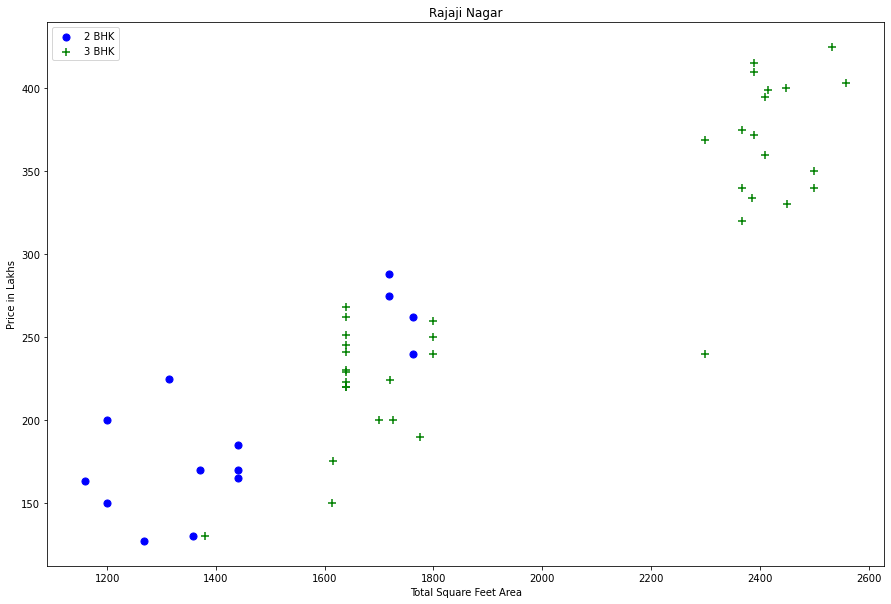

In [250]:
plot_scatter_chart(df6,'Rajaji Nagar')

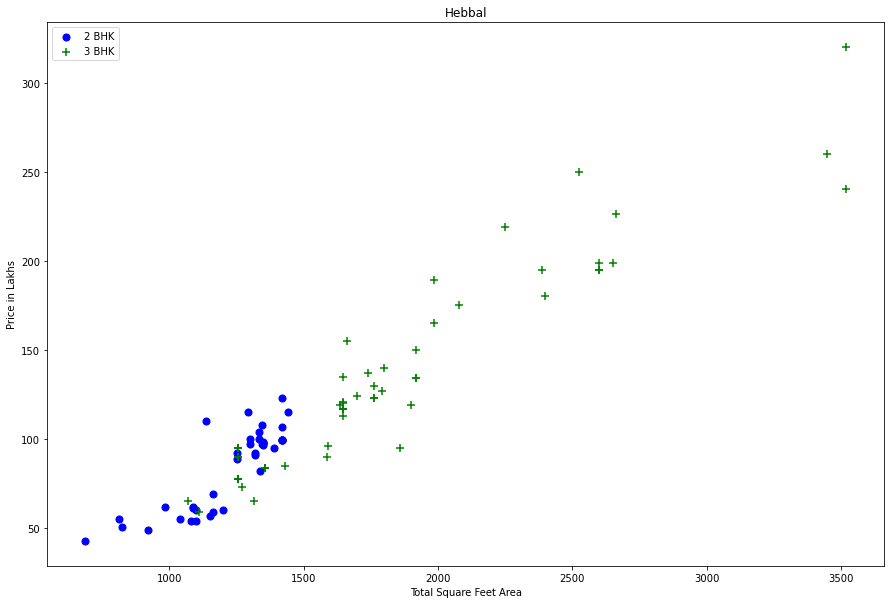

In [251]:
plot_scatter_chart(df6,'Hebbal')

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [258]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [259]:
df7=remove_bhk_outliers(df6)

In [260]:
df6.shape

(10247, 7)

In [261]:
df7.shape

(7336, 7)

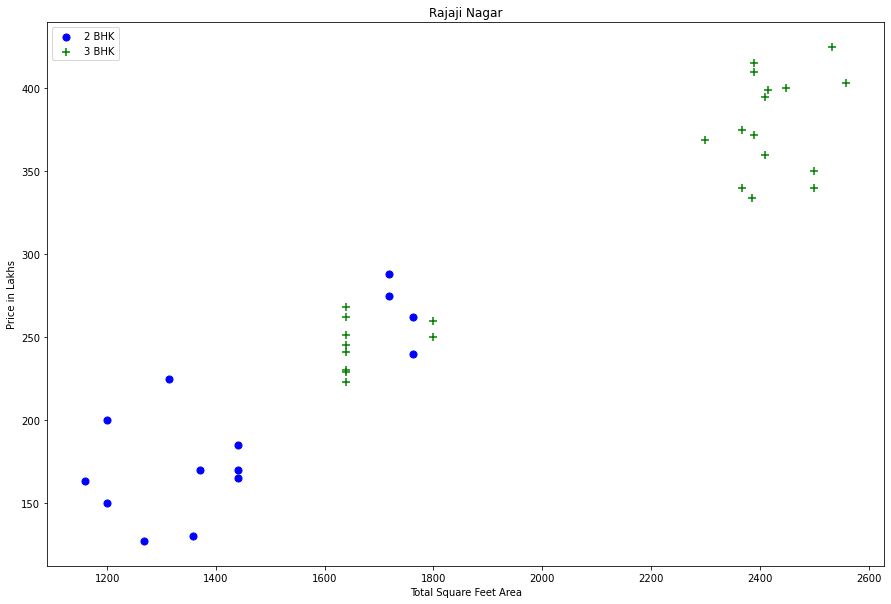

In [262]:
plot_scatter_chart(df7,'Rajaji Nagar')

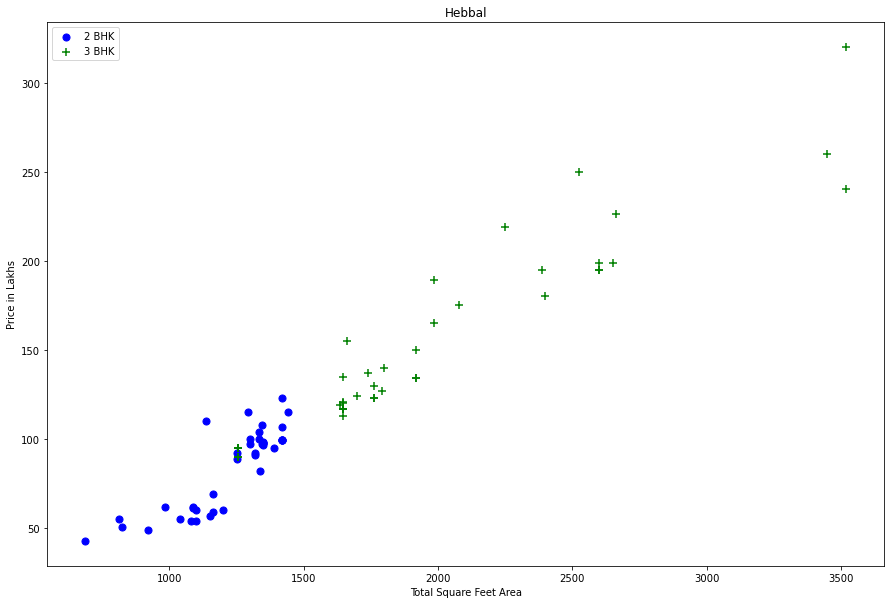

In [263]:
plot_scatter_chart(df7,'Hebbal')

Text(0, 0.5, 'Count')

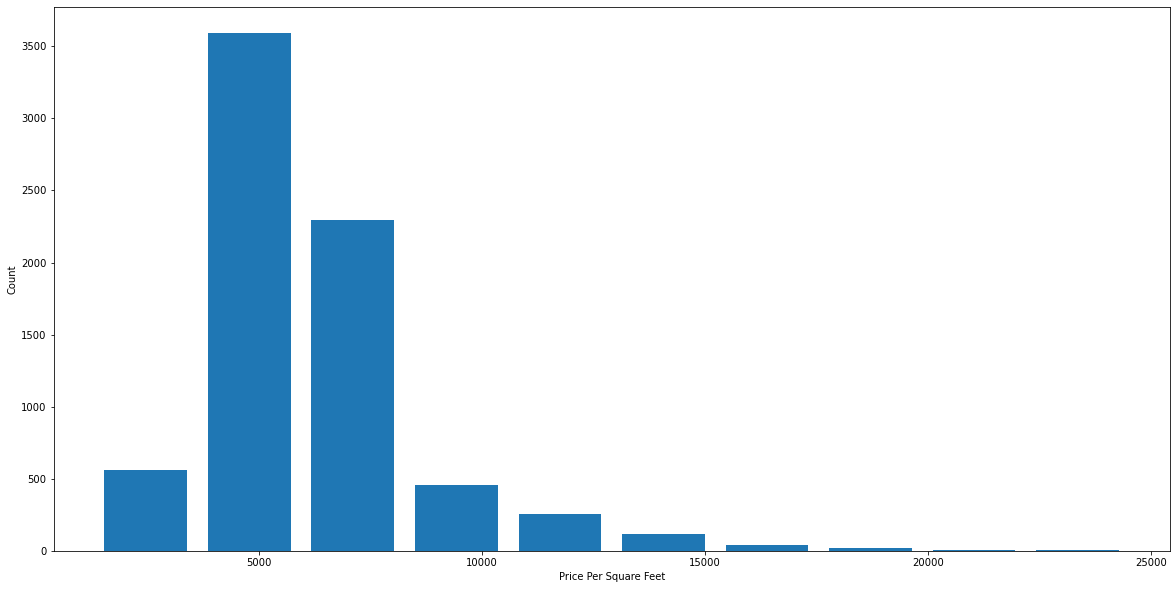

In [265]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [267]:
df7.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  6.,  7.,  9., 12., 16., 13.])

Text(0.5, 0, 'No of Bathrooms')

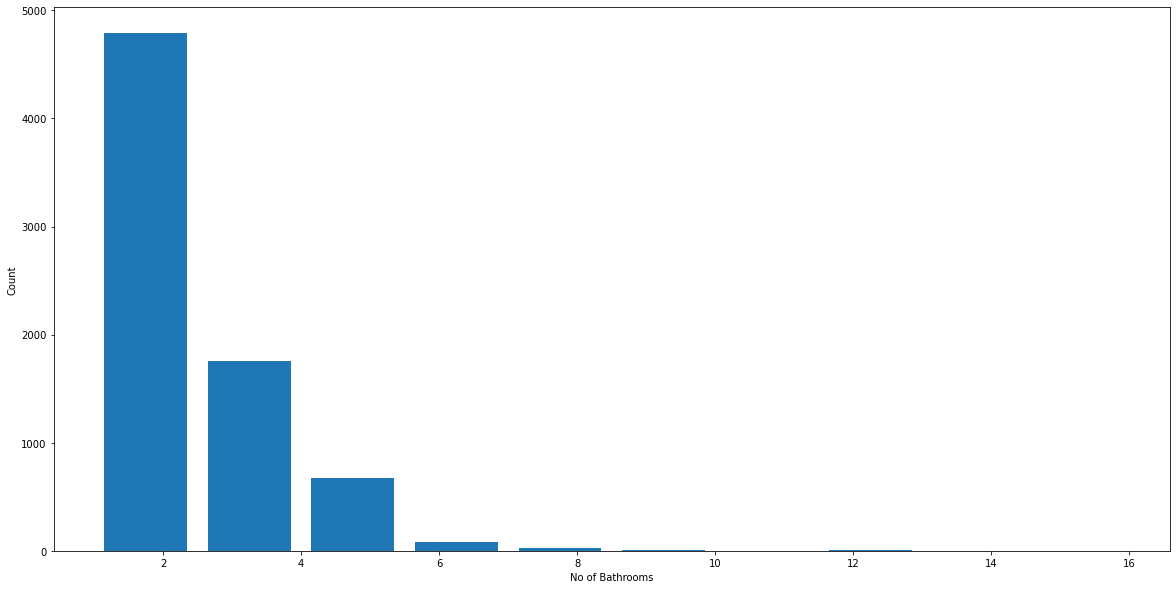

In [270]:
plt.hist(df7.bath,rwidth=0.8)
plt.ylabel("Count")
plt.xlabel("No of Bathrooms")

In [273]:
df7[df7.bath>df7.BHK+2]

,location,total_sqft,bath,price,Size,BHK,price_per_sqft
1655,Chikkabanavar,2460.0,7.0,80.0,4 Bedroom,4,3252.032520
5282,Nagasandra,7000.0,8.0,450.0,4 Bedroom,4,6428.571429
6770,Thanisandra,1806.0,6.0,116.0,3 BHK,3,6423.034330
8468,other,11338.0,9.0,1000.0,6 BHK,6,8819.897689


In [276]:
df8=df7[~(df7.bath>df7.BHK+2)]

In [278]:
df8.shape

(7332, 7)

In [279]:
df7.shape

(7336, 7)

In [283]:
df9=df8.drop(['Size','price_per_sqft'], axis='columns')

In [289]:
df9.head()

,location,total_sqft,bath,price,BHK
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2
5,Devarachikkanahalli,1200.0,2.0,83.0,2


In [290]:
df9.shape

(7332, 5)

In [291]:
dummies=pd.get_dummies(df9.location)

In [292]:
dummies.head()

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
dummies.shape

(7332, 259)

In [295]:
df11=pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')

In [296]:
df11.head()

,location,total_sqft,bath,price,BHK,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarabeesana Halli,1672.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750.0,3.0,149.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750.0,3.0,150.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250.0,2.0,40.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200.0,2.0,83.0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [297]:
df12=df11.drop('location',axis='columns')

In [298]:
df12.head()

,total_sqft,bath,price,BHK,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,40.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,83.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
df12.shape

(7332, 262)

In [300]:
df12.columns

Index(['total_sqft', 'bath', 'price', 'BHK', ' Devarabeesana Halli',
       ' Devarachikkanahalli', ' Electronic City', ' Mysore Highway',
       ' Rachenahalli', ' Thanisandra',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Whitefield, ', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=262)

In [301]:
x=df12.drop('price',axis='columns')

In [302]:
y=df12.price

In [304]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [305]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8803917781351448

In [315]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([ 8.35645841e-01,  8.40472283e-01, -3.50096725e+15, -1.16189276e+16,
        8.51207968e-01])

In [324]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [325]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,-3.023979e+15,{'normalize': False}
1,lasso,6.908871e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,7.141779e-01,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [333]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    x1 = np.zeros(len(x.columns))
    x1[0] = sqft
    x1[1] = bath
    x1[2] = bhk
    if loc_index >= 0:
        x1[loc_index] = 1

    return lr.predict([x1])[0]

In [334]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

84.37149340722321

In [335]:

predict_price('1st Phase JP Nagar',1000, 3, 3)

81.98105376244872

In [336]:
predict_price('Indira Nagar',1000, 2, 2)

190.49958127808574

In [338]:
predict_price('Indira Nagar',1000, 3, 3)

188.10914163331125

In [340]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [341]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))